<a href="https://colab.research.google.com/github/LeonGoergen/DocumentClassification/blob/main/classification/resultsSummary/FOSS_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import json
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Bachelor Thesis/Datasets/train.csv', sep="\t", header=0)

# Create Dataframe

In [ ]:
results = []

# Read the JSON files and add the dictionaries to the list
for file in os.listdir("/content/drive/MyDrive/Bachelor Thesis/Classification/FOSS Results"):
    if file.endswith(".json"):
        with open("/content/drive/MyDrive/Bachelor Thesis/Classification/FOSS Results/" + file, 'r') as f:
            results.append(json.load(f))

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(results)

# Convert training time to training time per document
df['training time (min)'] = df['training time (min)'] * 60000 / train.shape[0]
df.rename(columns={'training time (min)': 'training time per document (ms)', 'time per document (ms)': 'inference time per document (ms)'}, inplace=True)

In [ ]:
def highlight(data):
    attr = 'background-color: grey'
    data = data.astype(float)
    if data.name == 'training time per document (ms)' or data.name == 'inference time per document (ms)':
        is_min = data == data.min()
    else:
        is_min = data == data.max()
    return [attr if v else '' for v in is_min]

In [ ]:
grouped = df.groupby(['Algorithm', 'Method'], sort=True).sum()
grouped = grouped.round(2)
grouped = grouped.applymap(lambda x: '{:.2f}'.format(x))
grouped = grouped.style.apply(highlight)
grouped

# Plot Results

In [ ]:
df['Algorithm'].replace({'DecisionTree': 'DTC', 'LogisticRegression': 'LR', 'kNN': 'KNN'}, inplace=True)

# Create a list of all the algorithms sorted by accuracy
sorted_algo_by_acc = df.sort_values(by='Accuracy',ascending=False)['Algorithm'].tolist()
sorted_algo_by_acc = list(dict.fromkeys(sorted_algo_by_acc))

# Custom Order
all_algorithms = df['Algorithm'].tolist()
custom_order = {"NBC": 1, "KNN": 2, "DTC": 3, "LR": 4, "SVM": 5, "LSTM": 6, "Bi-LSTM": 7, "GRU": 8, "CNN": 9, "BERT": 10, "RoBERTa": 11, "XLNet": 12, "GPT-2": 13}
sorted_algo_by_acc = sorted(all_algorithms, key=lambda x: custom_order.get(x, len(custom_order)+1))
sorted_algo_by_acc = list(dict.fromkeys(sorted_algo_by_acc))

# Create a new dataframe containing the row with the highest accuracy value for each algorithm
df_max = pd.DataFrame(columns=df.columns)
for algo in sorted_algo_by_acc:
  max_acc_row = df[df['Algorithm'] == algo].loc[df[df['Algorithm'] == algo]['Accuracy'].idxmax()]
  df_max = df_max.append(max_acc_row, ignore_index=True)

<ipython-input-27-7f7b88d5ea1e>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(max_acc_row, ignore_index=True)
<ipython-input-27-7f7b88d5ea1e>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(max_acc_row, ignore_index=True)
<ipython-input-27-7f7b88d5ea1e>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(max_acc_row, ignore_index=True)
<ipython-input-27-7f7b88d5ea1e>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(max_acc_row, ignore_index=True)
<ipython-input-27-7f7b88d5ea1e>:17: FutureWarning: The frame.append method is deprecated and wil

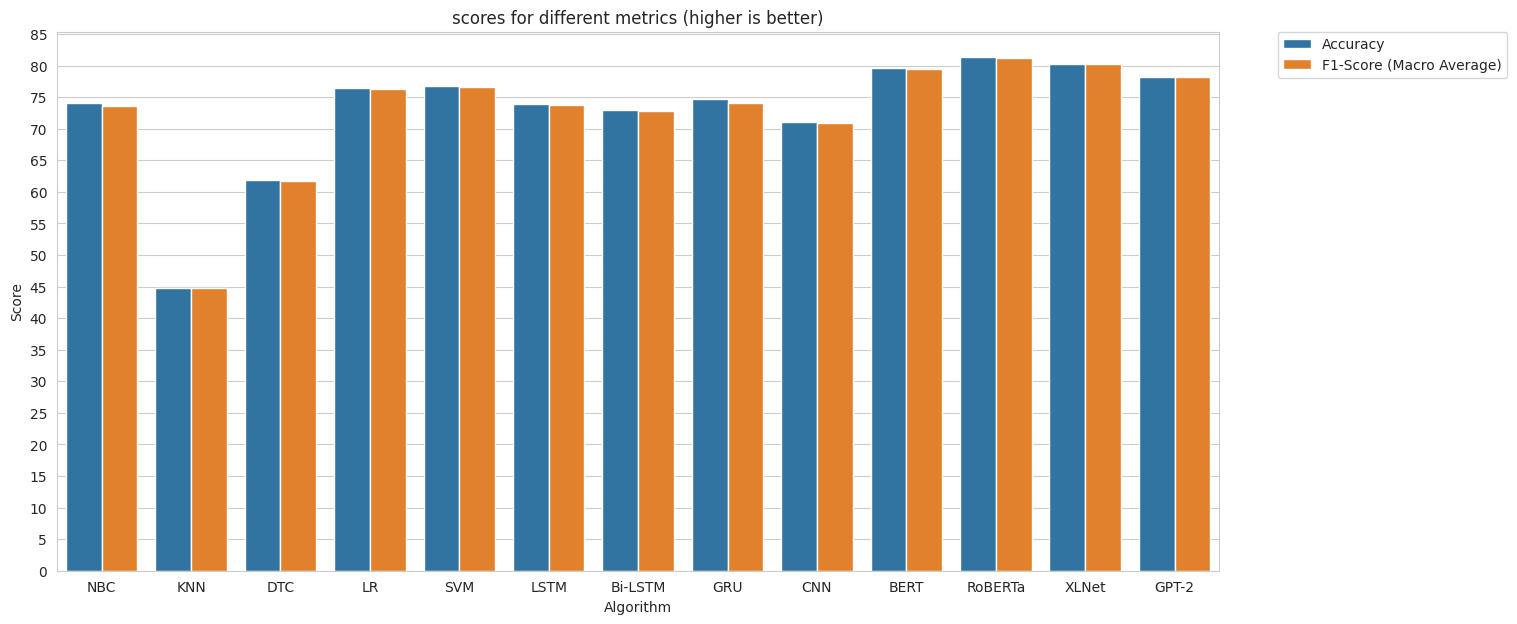

In [ ]:
# Create a new dataframe with the scores for each algorithm
scores_df = df_max[['Algorithm','Accuracy','F1-Score (Macro Average)']].melt(id_vars=['Algorithm'], var_name='Score', value_name='Value')

# Increase the size of the figure
plt.figure(figsize=(15,7))

# Add light grey gridlines
sns.set_style("whitegrid")

# Create the bar plot with thinner bars
sns.barplot(x='Algorithm', y='Value', hue='Score', data=scores_df, linewidth=1, order=sorted_algo_by_acc).set_title('scores for different metrics (higher is better)')

# Add Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#change y axis label
plt.ylabel('Score')
plt.yticks(np.arange(0, max(scores_df['Value'])+5, 5))

# Show the plot
plt.show()

<ipython-input-36-995c05cefa66>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(x/axis_scaling) for x in ax2.get_yticks()])


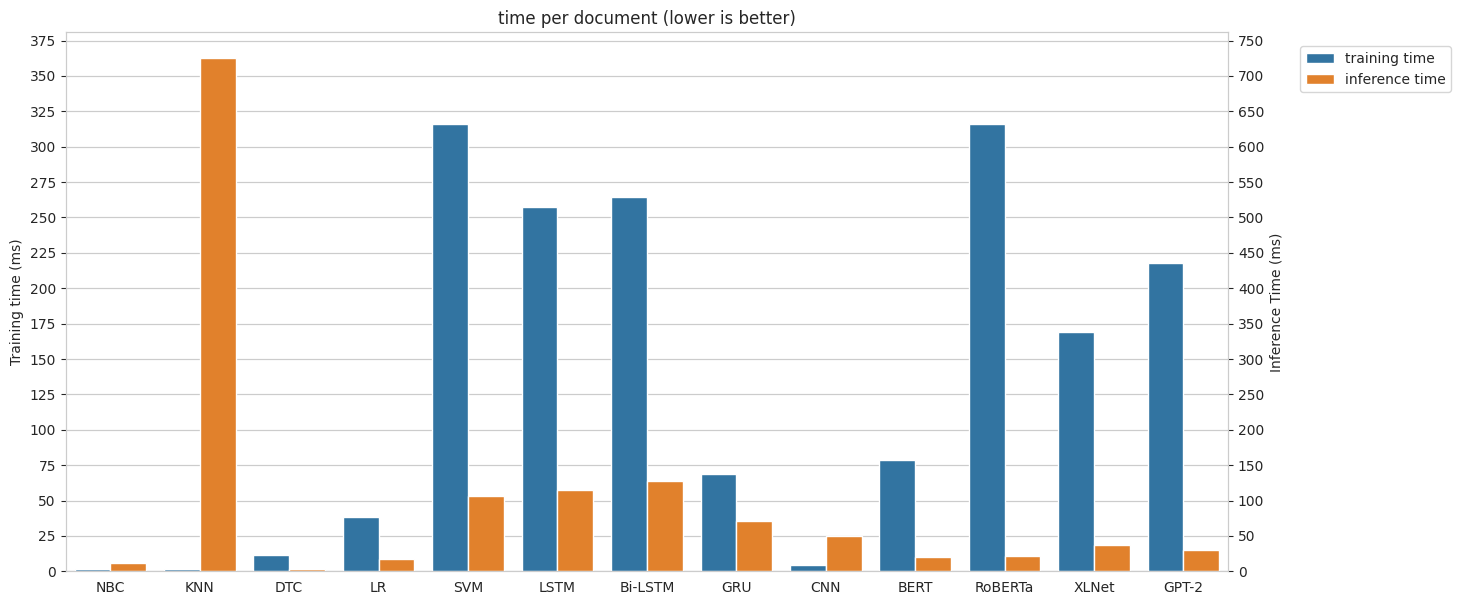

In [ ]:
# scale the x-axis values to the y-axis values
axis_scaling = 0.5

df_max.rename(columns={'training time per document (ms)': 'training time', 'inference time per document (ms)': 'inference time'}, inplace=True)

# Create a new dataframe with the scores for each algorithm
time_df = df_max[['Algorithm','training time','inference time']].melt(id_vars=['Algorithm'], var_name='Score', value_name='Value')
time_df.loc[time_df['Score'] == 'inference time', 'Value'] *= axis_scaling

# Set a minimum value so every bar will be displayed with at least a small line
for index, row in time_df.iterrows():
    if row['Value'] < 1.5:
       time_df.at[index, 'Value'] = 1.5

# Increase the size of the figure
fig, ax = plt.subplots(figsize=(15,7))

# Add light grey gridlines
sns.set_style("whitegrid")

# Create the bar plot with thinner bars
ax2 = ax.twinx()
sns.barplot(x='Algorithm', y='Value', hue='Score', data=time_df, linewidth=1, order=sorted_algo_by_acc).set_title('time per document (lower is better)')

# Add Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

#change y axis label
ax.set_ylabel('Training time (ms)')
ax2.set_ylabel('Inference Time (ms)')

# Set the number of y-axis gridlines
ax2.yaxis.set_major_locator(mticker.MultipleLocator(50*axis_scaling))
ax.yaxis.set_major_locator(mticker.MultipleLocator(50*axis_scaling))

# Set the number of x-axis gridlines
ax.xaxis.grid(False)
ax2.xaxis.grid(False)

# Align gridlines of the two y-axes
y_limits = np.array([ax.get_ylim(), ax2.get_ylim()])
ax.set_ylim(np.min(y_limits), np.max(y_limits))
ax2.set_ylim(np.min(y_limits), np.max(y_limits))

# Set the y-axis values to integers and multiply by 2
ax2.set_yticklabels([int(x/axis_scaling) for x in ax2.get_yticks()])

# Show the plot
plt.show()